# Exploratory Data Analysis and Visualization on Crimes in India

In [1]:
# importing libraries

import numpy as np
import pandas as pd
#import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
# reading the CSV by creating a DataFrame
df = pd.read_csv('crime_by_state.csv')

In [3]:
df

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,2001,45,69,22,3,2,6,518,950,312,1006
1,ANDHRA PRADESH,2002,60,98,18,0,4,12,568,830,459,1336
2,ANDHRA PRADESH,2003,33,79,27,1,15,4,615,1234,165,1386
3,ANDHRA PRADESH,2004,39,66,28,0,7,20,474,1319,68,1234
4,ANDHRA PRADESH,2005,37,74,21,0,0,9,459,1244,61,1212
...,...,...,...,...,...,...,...,...,...,...,...,...
451,TOTAL (ALL-INDIA),2008,622,1453,477,50,81,224,4134,11465,279,14645
452,TOTAL (ALL-INDIA),2009,629,1350,511,42,67,195,4322,11037,168,15091
453,TOTAL (ALL-INDIA),2010,572,1350,510,41,75,150,4344,10419,143,15039
454,TOTAL (ALL-INDIA),2011,673,1557,616,36,54,169,4247,11342,67,14958


### Data Properties

In [4]:
# shape
df.shape

(456, 12)

In [5]:
# columns
df.columns

Index(['STATE/UT', 'Year', 'Murder', 'Assault on women',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Prevention of atrocities (POA) Act',
       'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs'],
      dtype='object')

In [6]:
# Data Description

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
STATE/UT,456,38,GOA,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,456,NaN,NaN,NaN,2006.5,3.45584,2001,2003.75,2006.5,2009.25,2012
Murder,456,NaN,NaN,NaN,51.9737,152.178,0,0,1,19,763
Assault on women,456,NaN,NaN,NaN,104.717,300.093,0,0,4.5,45,1576
Kidnapping and Abduction,456,NaN,NaN,NaN,30.7763,95.3314,0,0,1,11,616
Dacoity,456,NaN,NaN,NaN,2.59868,7.85214,0,0,0,1,50
Robbery,456,NaN,NaN,NaN,6.26974,18.9621,0,0,0,3,133
Arson,456,NaN,NaN,NaN,17.875,53.0423,0,0,0,7,354
Hurt,456,NaN,NaN,NaN,323.382,914.35,0,0,4,191.25,4547
Prevention of atrocities (POA) Act,456,NaN,NaN,NaN,819.461,2362.67,0,0,21,345,13113


### Missing and unique values

In [7]:
# missing values

df.isna().sum()

STATE/UT                                0
Year                                    0
Murder                                  0
Assault on women                        0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

In [8]:
# unique values

df.nunique()

STATE/UT                                 38
Year                                     12
Murder                                   91
Assault on women                        125
Kidnapping and Abduction                 68
Dacoity                                  25
Robbery                                  36
Arson                                    61
Hurt                                    185
Prevention of atrocities (POA) Act      217
Protection of Civil Rights (PCR) Act     79
Other Crimes Against SCs                205
dtype: int64

In [9]:
df['Year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012], dtype=int64)

### Data Cleaning

In [10]:
df['STATE/UT'] = df['STATE/UT'].str.title()

In [11]:
# numerical cols
cols = ['Murder', 'Assault on women', 'Kidnapping and Abduction', 'Dacoity', 
        'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act', 
        'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']

# total column
df['Total'] = df[cols].sum(axis=1)

In [12]:
# drop columns with aggregate values

pattern = "Total*"
fltr = df['STATE/UT'].str.contains(pattern)
df = df[~fltr]
# df.tail()

In [13]:
df['STATE/UT'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A & N Islands', 'Chandigarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi', 'Lakshadweep', 'Puducherry'], dtype=object)

### Exploratory Data Analysis

#### Total cases over the years in each state in India

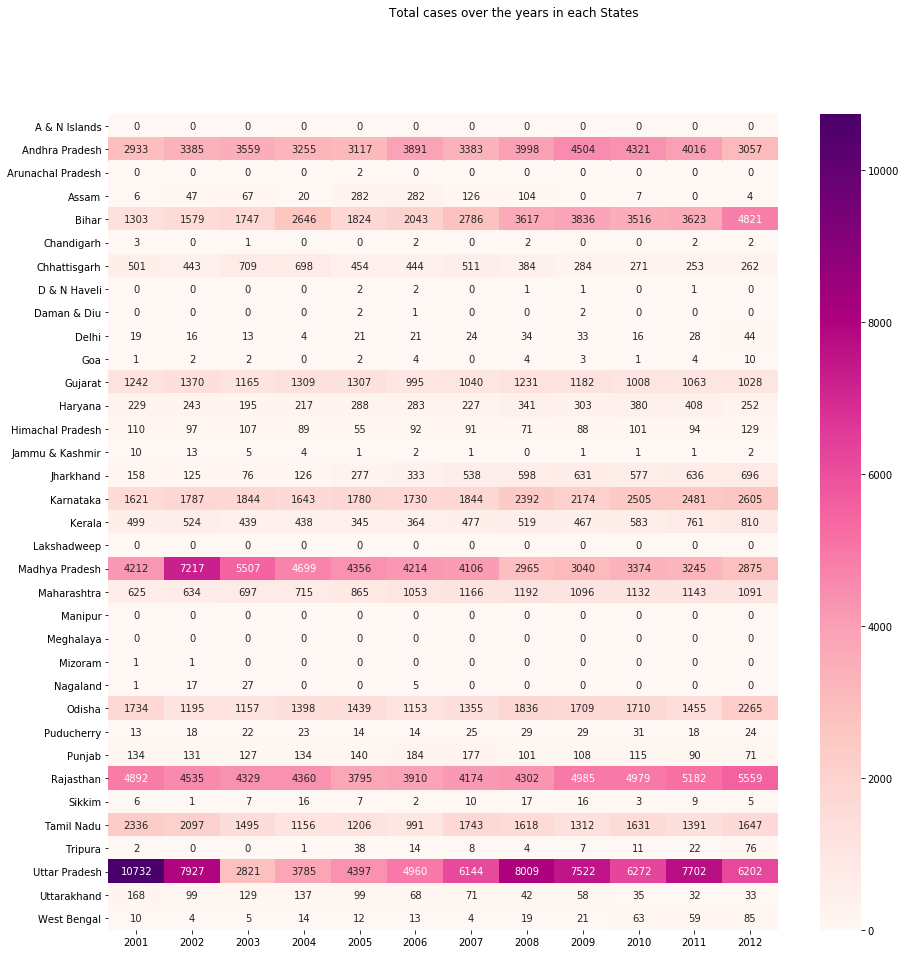

In [14]:
plt.figure(figsize=(15, 15))
df_pivot = df[['STATE/UT', 'Year', 'Total']].pivot_table(values='Total', index='STATE/UT', columns='Year', aggfunc='sum')
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='RdPu')
plt.suptitle('Total cases over the years in each States')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Number of cases for each state for a particular type of crime

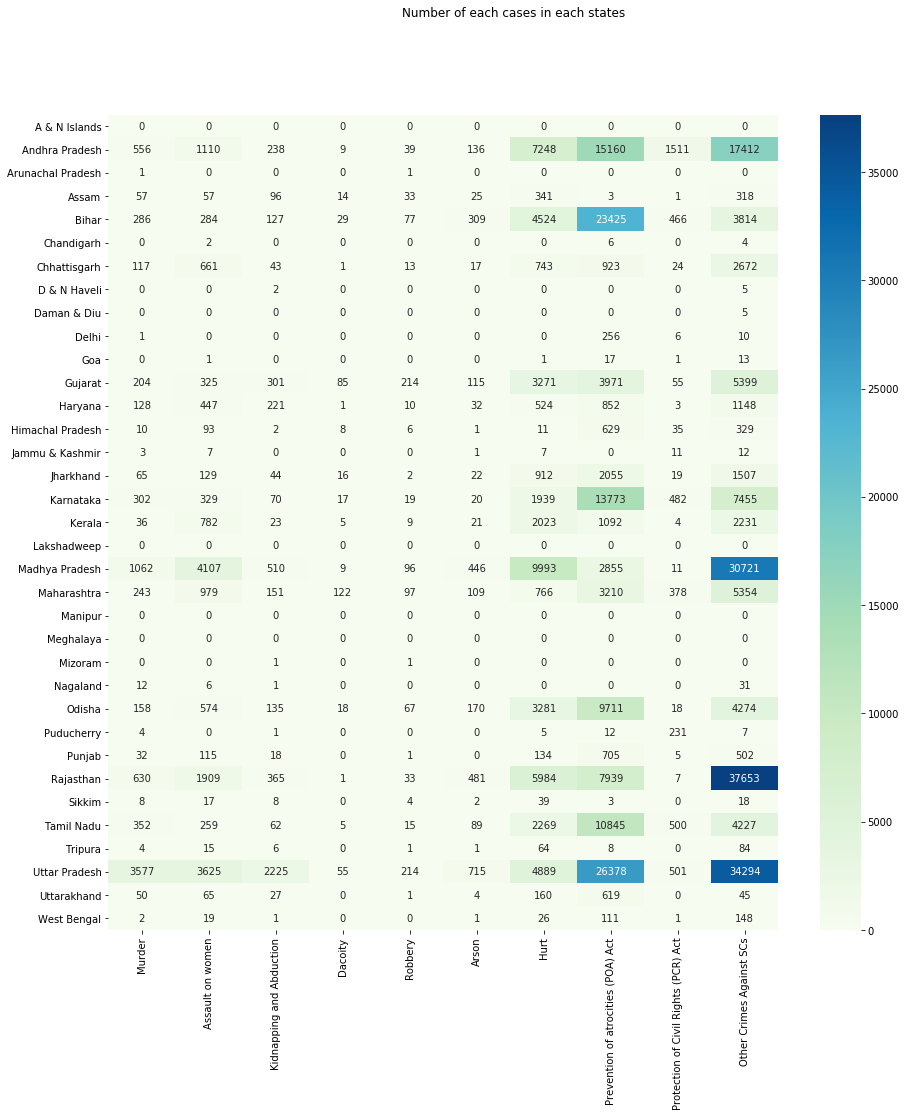

In [15]:
plt.figure(figsize=(15, 15))
df_pivot = df.groupby('STATE/UT')[cols].sum()
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='GnBu')
plt.suptitle('Number of each cases in each states')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Heatmap of the crime 'Murder' in different states over the years

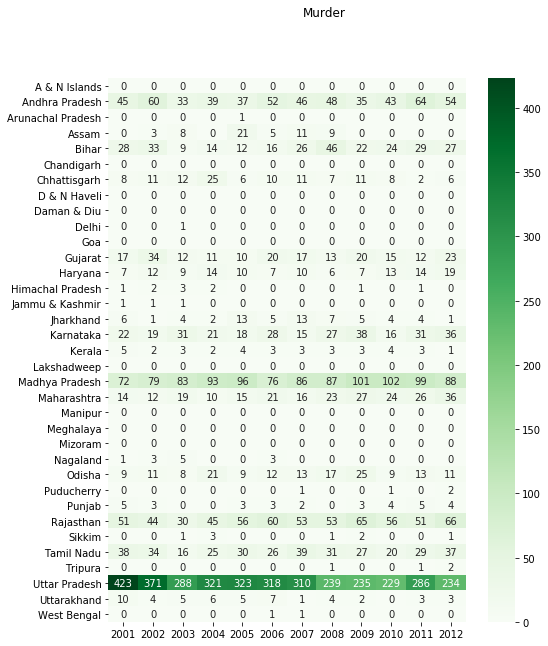

In [16]:
plt.figure(figsize=(8, 10))
df_pivot = df[['STATE/UT', 'Year', 'Murder']].pivot_table(values='Murder', index='STATE/UT', columns='Year', aggfunc='sum')
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Greens')
plt.suptitle('Murder')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Heatmap of the crime 'Assault on women' in different states over the years

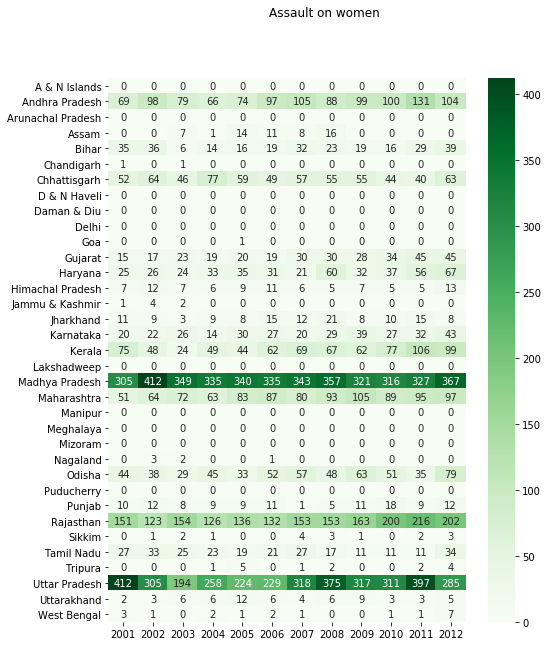

In [17]:
plt.figure(figsize=(8, 10))
df_pivot = df[['STATE/UT', 'Year', 'Assault on women']].pivot_table(values='Assault on women', index='STATE/UT', columns='Year', aggfunc='sum')
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Greens')
plt.suptitle('Assault on women')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Heatmap of the crime 'Kidnapping and Abduction' in different states over the years

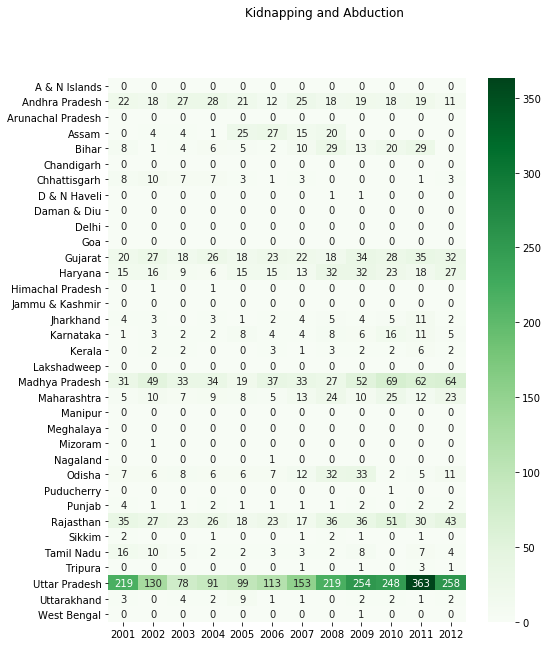

In [18]:
plt.figure(figsize=(8, 10))
df_pivot = df[['STATE/UT', 'Year', 'Kidnapping and Abduction']].pivot_table(values='Kidnapping and Abduction', index='STATE/UT', columns='Year', aggfunc='sum')
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Greens')
plt.suptitle('Kidnapping and Abduction')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Heatmap of the crime 'Dacoity' in different states over the years

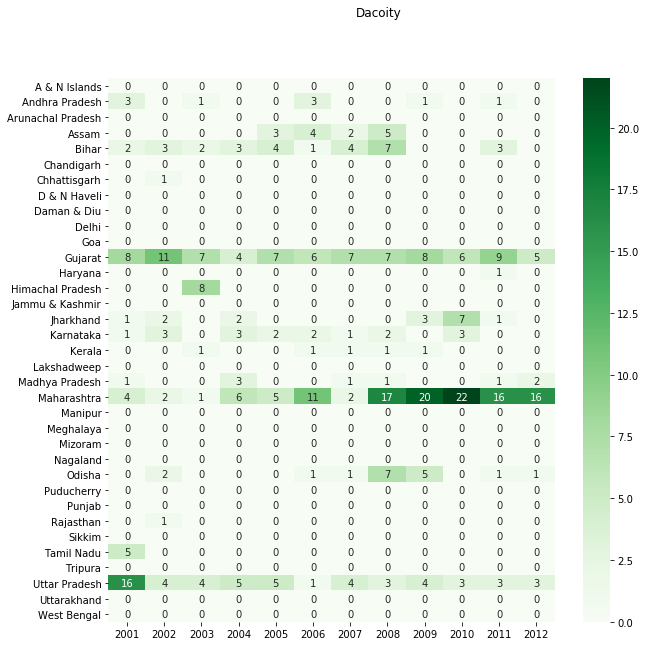

In [19]:
plt.figure(figsize=(10, 10))
df_pivot = df[['STATE/UT', 'Year', 'Dacoity']].pivot_table(values='Dacoity', index='STATE/UT', columns='Year', aggfunc='sum')
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Greens')
plt.suptitle('Dacoity')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Heatmap of the crime 'Robbery' in different states over the years

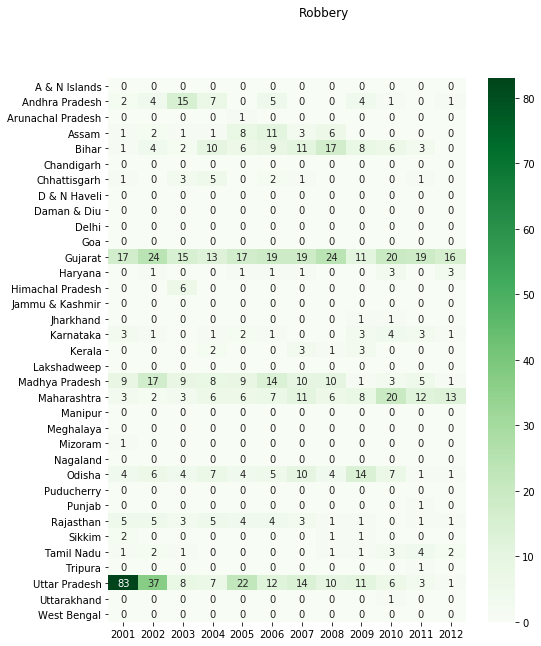

In [20]:
plt.figure(figsize=(8, 10))
df_pivot = df[['STATE/UT', 'Year', 'Robbery']].pivot_table(values='Robbery', index='STATE/UT', columns='Year', aggfunc='sum')
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Greens')
plt.suptitle('Robbery')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Heatmap of the crime 'Arson' in different states over the years

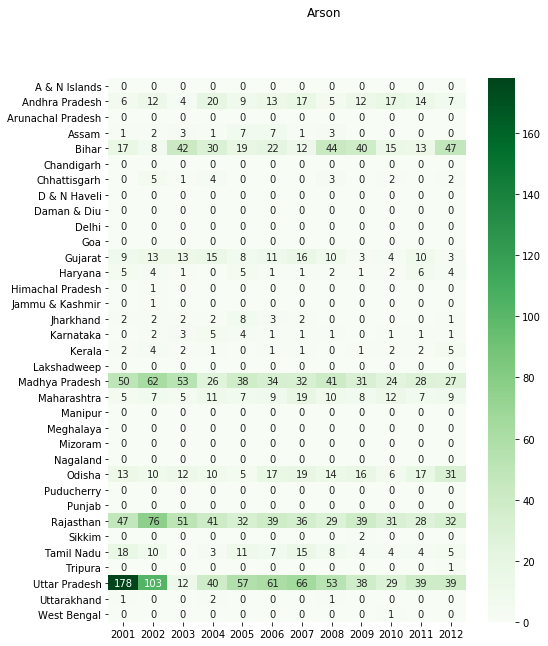

In [21]:
plt.figure(figsize=(8, 10))
df_pivot = df[['STATE/UT', 'Year', 'Arson']].pivot_table(values='Arson', index='STATE/UT', columns='Year', aggfunc='sum')
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Greens')
plt.suptitle('Arson')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Heatmap of the crime 'Hurt' in different states over the years

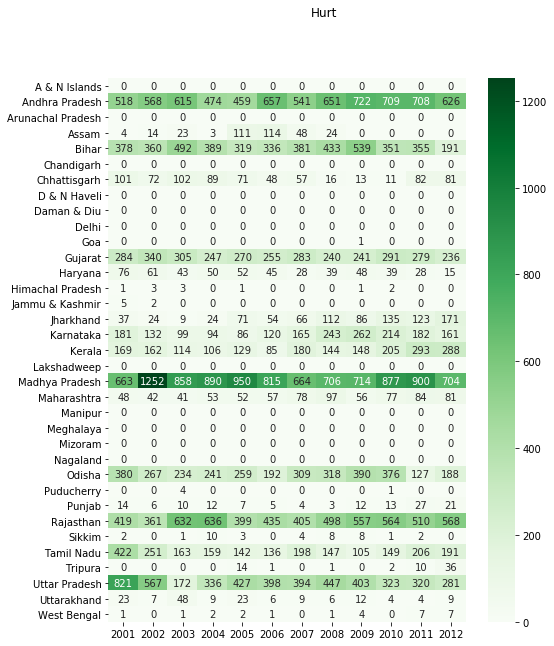

In [22]:
plt.figure(figsize=(8, 10))
df_pivot = df[['STATE/UT', 'Year', 'Hurt']].pivot_table(values='Hurt', index='STATE/UT', columns='Year', aggfunc='sum')
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Greens')
plt.suptitle('Hurt')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Heatmap of the crime 'Prevention of atrocities (POA) Act' in different states over the years

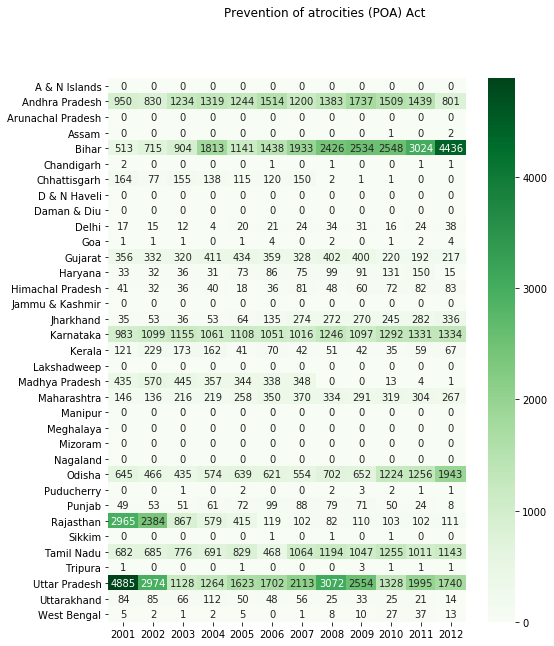

In [23]:
plt.figure(figsize=(8, 10))
df_pivot = df[['STATE/UT', 'Year', 'Prevention of atrocities (POA) Act']].pivot_table(values='Prevention of atrocities (POA) Act', index='STATE/UT', columns='Year', aggfunc='sum')
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Greens')
plt.suptitle('Prevention of atrocities (POA) Act')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Heatmap of the crime 'Protection of Civil Rights (PCR) Act' in different states over the years

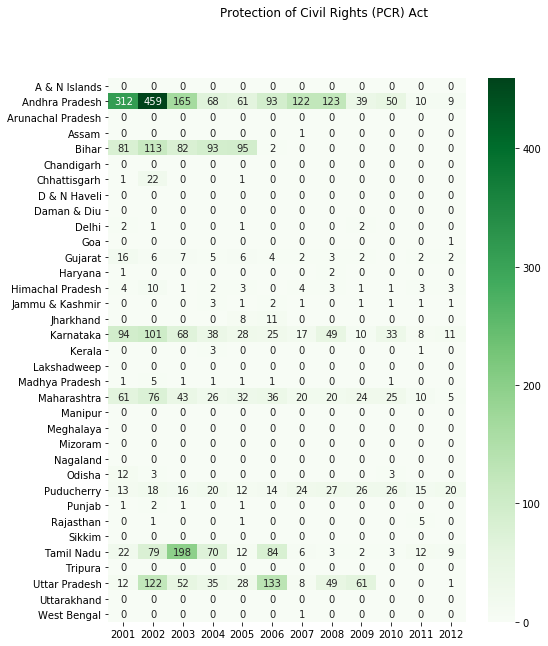

In [24]:
plt.figure(figsize=(8, 10))
df_pivot = df[['STATE/UT', 'Year', 'Protection of Civil Rights (PCR) Act']].pivot_table(values='Protection of Civil Rights (PCR) Act', index='STATE/UT', columns='Year', aggfunc='sum')
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Greens')
plt.suptitle('Protection of Civil Rights (PCR) Act')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Heatmap of the crime 'Other Crimes Against SCs' in different states over the years

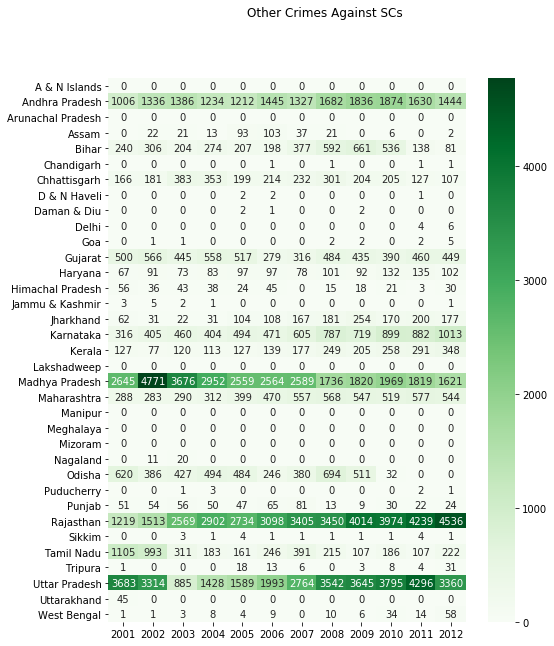

In [25]:
plt.figure(figsize=(8, 10))
df_pivot = df[['STATE/UT', 'Year', 'Other Crimes Against SCs']].pivot_table(values='Other Crimes Against SCs', 
                                                                            index='STATE/UT', columns='Year', aggfunc='sum')
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Greens')
plt.suptitle('Other Crimes Against SCs')
plt.xlabel('')
plt.ylabel('')
plt.show()

<h3 align="center"> ------------------------------------------- x ------------------------------------------- </h3>